# <p style="text-align: center;"> NETFLIX DATASET </p>

### IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import string
import csv
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from collections import Counter
from sklearn import metrics

warnings.filterwarnings("ignore")

### LOADING CSV

In [2]:
Data = pd.read_csv("Netflix.csv")
print(Data)

            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1    

### DATA PREPROCESSING

In [3]:
# Finding size of dataset (i.e number of rows & columns of the dataset.)
print("Rows: ",Data.shape[0])
print("Columns: ",Data.shape[1])

Rows:  1009
Columns:  7


In [4]:
Data.head() # head() function by default showcases first five rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
Data.shape

(1009, 7)

In [6]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


Different Data Types In Datasets:

In [7]:
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [10]:
# Finding Number of samples under target variable
print(f"Number of samples under target value: \n{Data['Volume'].value_counts()}")
sns.countplot(Data.Volume).set_ylim(0, 2)
plt.show()

Number of samples under target value: 
6717700    2
5439200    2
3732200    2
6997900    2
4408200    1
          ..
5019000    1
5358200    1
5428500    1
5667200    1
7782400    1
Name: Volume, Length: 1005, dtype: int64


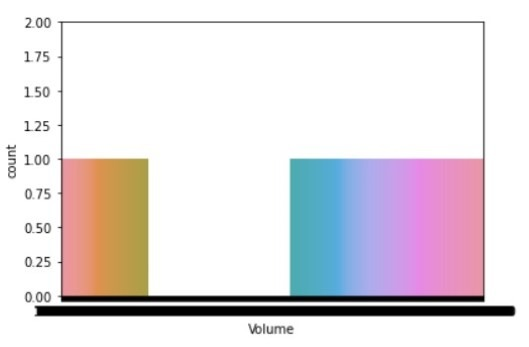

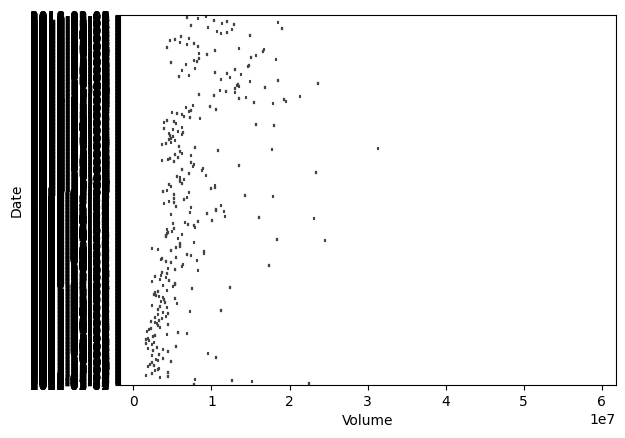

In [11]:
sns.boxplot(x = "Volume", y = "Date", data = Data)
plt.show()

The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model.

<AxesSubplot: >

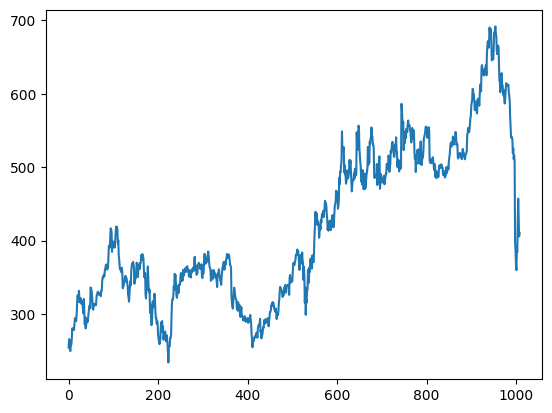

In [12]:
# Plot the True Adj Close Value
Data['Adj Close'].plot()

### IMPUNING VALUES

In [13]:
Data.isnull().values.any()  # Checking whether we have any missing values in dataset

False

In [14]:
Data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the dataset.

### DATA STANDARDIZATION

In [15]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [16]:
Data['Volume'][:5]

0    11896100
1    12595800
2     8981500
3     9306700
4    16906900
Name: Volume, dtype: int64

In [17]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
Data["Volume"] = scalar.fit_transform(Data["Volume"].values.reshape(-1,1))
print ("After Standardisation: ")
Data.head()

After Standardisation: 


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,0.791791
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,0.919875
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,0.258257
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,0.317787
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,1.709045


### DATA NORMALIZATION

In [18]:
norm = MinMaxScaler()
Data["Volume"] = norm.fit_transform(Data["Volume"].values.reshape(-1,1))
print ("After Normalisation: ")
Data.head()

After Normalisation: 


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,0.186150
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,0.198264
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,0.135690
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,0.141320
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,0.272902


Making data available for various machine learning model through normalization.

#### Discretization

In [19]:
Data['Adj Close'].unique()

array([254.259995, 265.720001, 264.559998, 250.100006, 249.470001,
       257.950012, 258.269989, 266.      , 280.269989, 278.519989,
       278.549988, 281.040009, 278.140015, 285.929993, 294.160004,
       290.609985, 291.380005, 290.390015, 301.049988, 315.      ,
       325.220001, 321.160004, 317.      , 331.440002, 321.299988,
       315.880005, 321.549988, 321.089996, 318.450012, 313.480011,
       317.5     , 316.480011, 306.700012, 300.940002, 320.350006,
       300.690002, 285.769989, 295.350006, 280.290009, 283.670013,
       288.940002, 293.970001, 288.850006, 289.929993, 298.070007,
       303.670013, 309.25    , 311.649994, 307.779999, 336.059998,
       334.519989, 332.700012, 327.769989, 318.690002, 307.019989,
       305.76001 , 313.980011, 311.76001 , 312.459991, 313.299988,
       313.359985, 311.690002, 320.089996, 326.26001 , 326.890015,
       330.299988, 329.600006, 326.459991, 328.529999, 326.130005,
       328.190002, 324.179993, 331.820007, 331.619995, 344.720

In [20]:
print(Data['Adj Close'].max())
print(Data['Adj Close'].min())

691.690002
233.880005


In [21]:
Data['bin_of_Adj Close'] = pd.cut(Data['Adj Close'], [200,300,400,500,600,700],
                                  labels = ['200-300', '300-400', '400-500', '500-600', '600-700'])

In [22]:
Data.groupby([Data["bin_of_Adj Close"]]).count()

,Date,Open,High,Low,Close,Adj Close,Volume
bin_of_Adj Close,,,,,,,
200-300,136,136,136,136,136,136,136
300-400,410,410,410,410,410,410,410
400-500,169,169,169,169,169,169,169
500-600,231,231,231,231,231,231,231
600-700,63,63,63,63,63,63,63


In [23]:
for column in Data.columns:
    print("------  " + column + "  ------")
    print(Data[column].value_counts())

------  Date  ------
2018-02-05    1
2020-10-14    1
2020-09-25    1
2020-09-28    1
2020-09-29    1
             ..
2019-06-14    1
2019-06-17    1
2019-06-18    1
2019-06-19    1
2022-02-04    1
Name: Date, Length: 1009, dtype: int64
------  Open  ------
365.000000    4
359.000000    3
355.000000    3
295.000000    3
425.000000    2
             ..
378.290009    1
378.190002    1
379.059998    1
382.769989    1
407.309998    1
Name: Open, Length: 976, dtype: int64
------  High  ------
303.549988    2
353.609985    2
505.100006    2
447.000000    2
514.500000    2
             ..
375.000000    1
371.000000    1
366.790009    1
370.850006    1
412.769989    1
Name: High, Length: 983, dtype: int64
------  Low  ------
454.000000    3
503.600006    2
478.630005    2
365.000000    2
514.200012    2
             ..
370.200012    1
358.290009    1
361.600006    1
363.200012    1
396.640015    1
Name: Low, Length: 989, dtype: int64
------  Close  ------
357.320007    3
553.409973    2
335.660

Making the values group wise and making continuous values as discrete.

### DATA SUMMARIZATION

In [24]:
print(Data.shape)

(1009, 8)


In [25]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,419.059673,425.320703,412.374044,419.000733,419.000733,0.111265
std,108.537532,109.262960,107.555867,108.289999,108.289999,0.094624
min,233.919998,250.649994,231.229996,233.880005,233.880005,0.000000
25%,331.489990,336.299988,326.000000,331.619995,331.619995,0.051037
50%,377.769989,383.010010,370.880005,378.670013,378.670013,0.082938
75%,509.130005,515.630005,502.529999,509.079987,509.079987,0.141592
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.000000


### DATA VISUALIZATION

#### Histogram

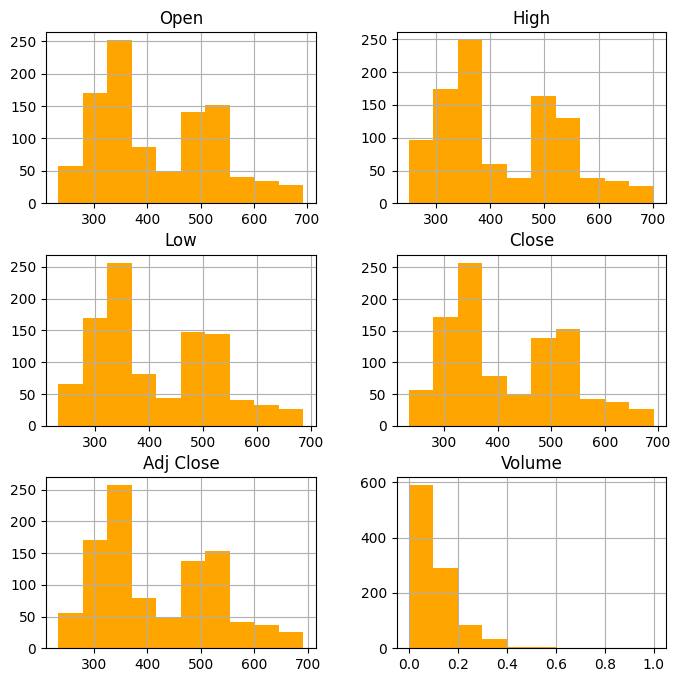

In [26]:
Data.hist(color = "orange", figsize = (8,8))
plt.show()

<AxesSubplot: >

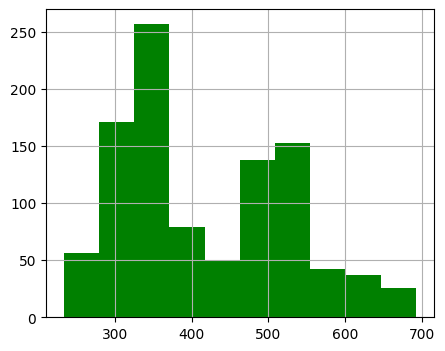

In [27]:
Data['Close'].hist(color = "green", figsize = (5,4))

#### Scatter Plot

<AxesSubplot: >

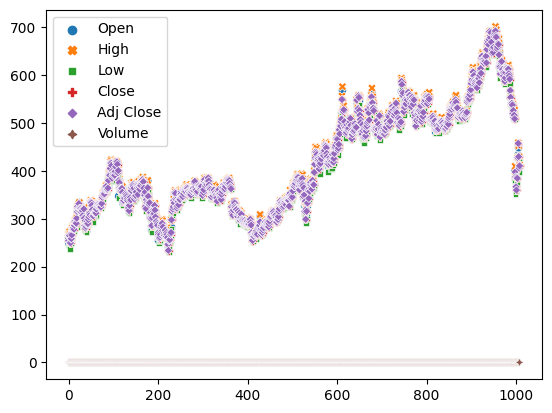

In [28]:
sns.scatterplot(Data)

<AxesSubplot: xlabel='Close', ylabel='Volume'>

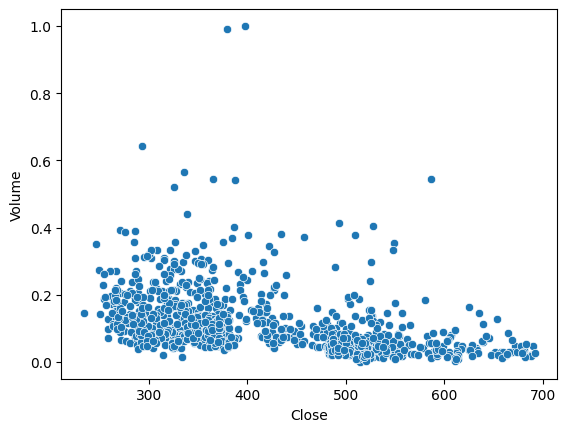

In [29]:
sns.scatterplot(x = Data['Close'], y = Data['Volume'])    

#### Boxplot

<AxesSubplot: >

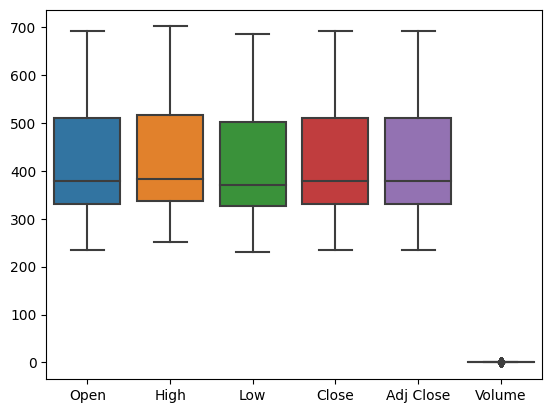

In [30]:
sns.boxplot(Data)

<AxesSubplot: xlabel='Close', ylabel='Volume'>

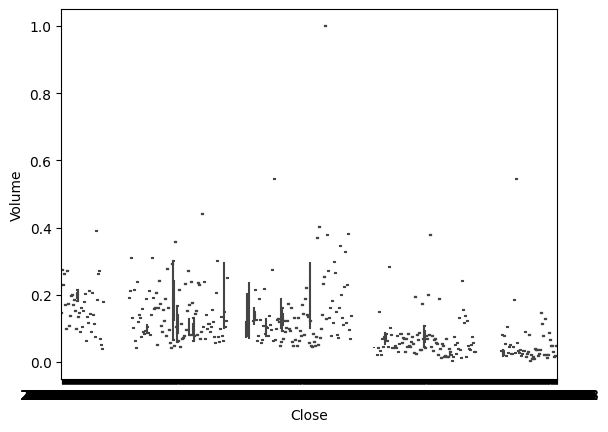

In [31]:
sns.boxplot(x = 'Close', y = 'Volume', data=Data)

These are the various visualizations of data. Now we can use this data to apply on various models.

## <p style="text-align: center;"> PHASE 2 </p>

### DATA MODELLING
Split your data into training, validation, and testing

In [32]:
X = Data[["Open", "High", "Low", "Volume"]]
y = Data["Close"]

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print("Train Size: " + str(X_train.shape[0]))
print("Test Size: " + str(X_test.shape[0]))
print("Validation Size: " + str(X_val.shape[0]))

Train Size: 645
Test Size: 202
Validation Size: 162


## 1. LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred_lr = lr_model.predict(X_test)

lr_score_test = lr_model.score(X_test, y_test)
lr_score_train = lr_model.score(X_train, y_train)

# Print the evaluation score
print('Test Data Acurracy:', lr_score_test)
print('Train Data Acurracy:', lr_score_train)

Test Data Acurracy: 0.9988210726468153
Train Data Acurracy: 0.9987263351602502


#### ACCURACY

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 5)
scores = cross_val_score(lr_model, X, y, cv = kf)
print("Average Accuracy Using KFold:", scores.mean())

Average Accuracy Using KFold: 0.9893231234396737


#### MEAN ABSOLUTE ERROR

In [35]:
from sklearn.metrics import mean_absolute_error
lr_mae = mean_absolute_error(y_test, y_pred_lr)
print('Mean Absolute Error:', lr_mae)

Mean Absolute Error: 2.8847294631532154


## 2. KNN

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN model
knn_model = KNeighborsRegressor(n_neighbors = 5)

# Fit the model to the data
knn_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred_knn = knn_model.predict(X_test)

knn_score_test = knn_model.score(X_test, y_test)
knn_score_train = knn_model.score(X_train, y_train)

# Print the evaluation score
print('Test Data Acurracy:', knn_score_test)
print('Train Data Acurracy:', knn_score_train)

Test Data Acurracy: 0.9978202403332014
Train Data Acurracy: 0.9984142837324946


#### ACCURACY

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 5)
scores = cross_val_score(knn_model, X, y, cv = kf)
print("Average Accuracy Using KFold:", scores.mean())

Average Accuracy Using KFold: 0.9008601196897315


#### MEAN ABSOLUTE ERROR

In [38]:
from sklearn.metrics import mean_absolute_error
knn_mae = mean_absolute_error(y_test, y_pred_knn)
print('Mean Absolute Error:', knn_mae)

Mean Absolute Error: 3.9163471653465396


## 3. SUPPORT VECTOR MACHINE

In [39]:
from sklearn.svm import SVR

# Create a SVM regression model
svm_model = SVR(kernel="rbf", C=1.0, epsilon=0.1)

# Fit the model to the data
svm_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred_svm = svm_model.predict(X_test)

svm_score_test = svm_model.score(X_test, y_test)
svm_score_train = svm_model.score(X_train, y_train)

# Print the evaluation score
print('Test Data Acurracy:',svm_score_test)
print('Train Data Acurracy:',svm_score_train)

Test Data Acurracy: 0.9141561209362162
Train Data Acurracy: 0.9232107816365819


#### ACCURACY

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 5)
scores = cross_val_score(svm_model, X, y, cv = kf)
print("Average Accuracy Using KFold:", scores.mean())

Average Accuracy Using KFold: 0.5246008800923047


#### MEAN ABSOLUTE ERROR

In [41]:
from sklearn.metrics import mean_absolute_error
svm_mae = mean_absolute_error(y_test, y_pred_svm)
print('Mean Absolute Error:', svm_mae)

Mean Absolute Error: 18.903773568622483


### Accuracy vs. Algorithm Plot

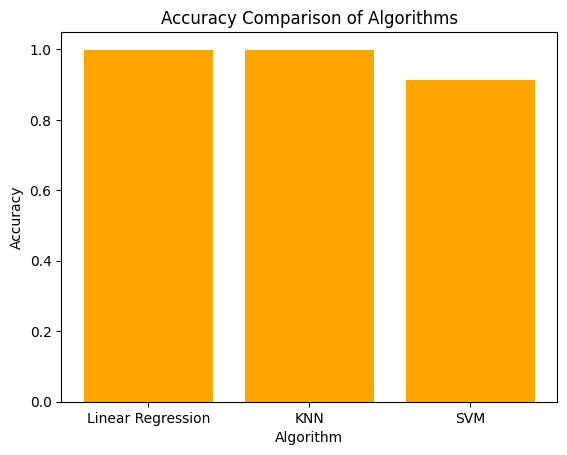

In [42]:
plt.bar(["Linear Regression", "KNN", "SVM"], [lr_score_test, knn_score_test, svm_score_test], color = "orange")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Algorithms")
plt.show()

### MAE vs. Algorithm Plot

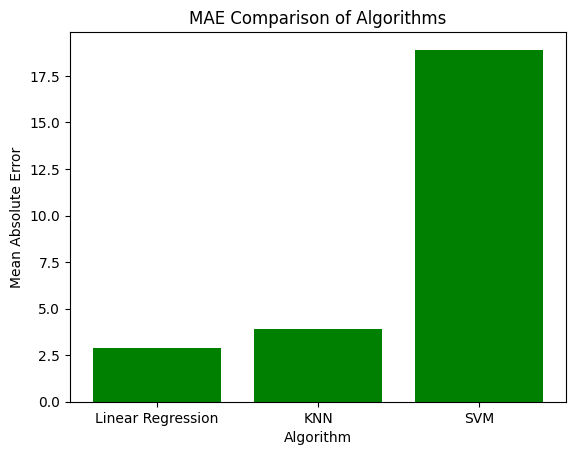

In [43]:
plt.bar(["Linear Regression", "KNN", "SVM"], [lr_mae, knn_mae, svm_mae], color = "green")
plt.xlabel("Algorithm")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison of Algorithms")
plt.show()

### <p style="text-align: center;"> ****** </p>